In [64]:
import geopandas as gpd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import shapefile
import geemap, ee 
# import ee 
# import geemap.eefolium as geemap
# COMMENT: folium for datapane; otherwise call regular geemap as it runs with better functionality (ipyleaflet)

In [65]:
try:
        ee.Initialize()
except Exception as e:
        ee.Authenticate()
        ee.Initialize()

In [66]:
# Set path to wd
path = os.path.join("/","Users","MT","Nextcloud","Projects","GOV-BGD20GIZ7333_CRISC_AI")

In [84]:
shp_path = os.path.join(path,"CRISC_RS","bgd_adm_bbs_20201113_SHP","bgd_admbnda_adm3_bbs_20201113.shp")
gdf = gpd.read_file(shp_path, crs='EPSG:4326')

In [87]:
gdf

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,1.171879,0.021753,Abhaynagar,BD404104,None,None,None,Jessore,BD4041,Khulna,BD40,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((89.44292 23.10798, 89.44288 23.10777..."
1,0.068860,0.000203,Adabor,BD302602,None,None,None,Dhaka,BD3026,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.35181 23.77788, 90.35201 23.77785..."
2,1.233722,0.015457,Adamdighi,BD501006,None,None,None,Bogra,BD5010,Rajshahi,BD50,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((89.08198 24.87312, 89.08235 24.87305..."
3,1.032025,0.017815,Aditmari,BD555202,None,None,None,Lalmonirhat,BD5552,Rangpur,BD55,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((89.42583 26.04433, 89.42939 26..."
4,0.687378,0.013744,Agailjhara,BD100602,None,None,None,Barisal,BD1006,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.17736 23.04662, 90.17753 23.04661..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,0.152158,0.000621,Uttara,BD302695,None,None,None,Dhaka,BD3026,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.38476 23.89490, 90.38476 23.89490..."
540,1.102709,0.022191,Wazirpur,BD100694,None,None,None,Barisal,BD1006,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.03673 22.93440, 90.03690 22.93439..."
541,1.048280,0.023558,Zakiganj,BD609194,None,None,None,Sylhet,BD6091,Sylhet,BD60,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((92.39664 24.98883, 92.39687 24.98882..."
542,0.913345,0.022822,Zanjira,BD308694,None,None,None,Shariatpur,BD3086,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.30197 23.45155, 90.30219 23.45150..."


In [89]:
x = gdf.iloc[496,:]
x

Shape_Leng                                             1.406242
Shape_Area                                             0.027997
ADM3_EN                                         Sirajganj Sadar
ADM3_PCODE                                             BD508878
ADM3_REF                                                   None
ADM3ALT1EN                                                 None
ADM3ALT2EN                                                 None
ADM2_EN                                               Sirajganj
ADM2_PCODE                                               BD5088
ADM1_EN                                                Rajshahi
ADM1_PCODE                                                 BD50
ADM0_EN                                              Bangladesh
ADM0_PCODE                                                   BD
date                                                 2015-01-01
validOn                                              2020-11-13
validTo                                 

In [67]:
# helper function: lookup shp index by city/levell geodataframe format, ee object construct
def shp_to_ee_fmt(city, level):
    dic = {'Satkhira':{2:56,3:469,4:4307},'Sirajganj':{2:59,3:496,4:4493}}
    ind = dic[city][level]
    shp_path = os.path.join(path,"CRISC_RS","bgd_adm_bbs_20201113_SHP","bgd_admbnda_adm"+str(level)+"_bbs_20201113.shp")
    gdf = gpd.read_file(shp_path, crs='EPSG:4326')
    x = gdf.iloc[ind:ind+1,:]
    data = json.loads(x.to_json())
    return data['features'][0]['geometry']['coordinates']

# Source shp: https://data.humdata.org/dataset/administrative-boundaries-of-bangladesh-as-of-2015

# Histogram function
def histo(dist, band, bins, city, level):
    aoi = ee.Geometry.MultiPolygon(shp_to_ee_fmt(city = city, level = level))
    arr = np.array(dist.sampleRectangle(region=aoi).get(band).getInfo())
    data = arr.flatten()
    fig, ax = plt.subplots(figsize=(15,5))
    sns.histplot(data, bins=bins,ax=ax)
    plt.title('Distribution: '+city, fontsize=20)
    
# UPPR feature collection: Sirajganj
# shp_to_ee without geemap
def ng_shp_to_ee(shp):
    shp_path = os.path.join(path,"CRISC_RS","All",shp)
    in_gdf = gpd.read_file(shp_path)
    out_gdf = in_gdf.to_crs(epsg="4326")
    out_shp = shp_path.replace(".shp", "_gcs.shp")
    out_gdf.to_file(out_shp)
    in_shp = out_shp
    reader = shapefile.Reader(in_shp)
    out_dict = reader.__geo_interface__
    out_ee = ee.FeatureCollection(out_dict["features"])
    return out_ee
#uppr = geemap.shp_to_ee(shp_path)

In [68]:
uppr_set = ng_shp_to_ee("Poor_settlement_without_single.shp")
uppr_land = ng_shp_to_ee("Vacant_lands.shp")
uppr_single = ng_shp_to_ee("Single_settlement_point.shp")

In [69]:
# UPPR feature collection: Sirajganj
# shp_to_ee without geemap
import shapefile
shp_path = os.path.join(path,"CRISC_RS","All","Poor_settlement_without_single.shp")
in_gdf = gpd.read_file(shp_path)
out_gdf = in_gdf.to_crs(epsg="4326")
out_shp = shp_path.replace(".shp", "_gcs.shp")
out_gdf.to_file(out_shp)
in_shp = out_shp
reader = shapefile.Reader(in_shp)
out_dict = reader.__geo_interface__
uppr_set = ee.FeatureCollection(out_dict["features"])
#uppr = geemap.shp_to_ee(shp_path)

In [71]:
viirs = ee.Image(ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate("2019-01-01","2019-12-31").median().select('avg_rad'))

In [72]:
srtm = ee.Image("CGIAR/SRTM90_V4").select('elevation')
srtmVis = {'min':-1, 'max':14,'palette':['#f7fcfd','#e5f5f9','#ccece6','#99d8c9','#66c2a4','#41ae76','#238b45','#005824']}

In [73]:
water = ee.Image("JRC/GSW1_3/GlobalSurfaceWater").select('occurrence')
waterVis= {"min":0, "max":50,"palette":['lightblue', 'blue'], "bands":"occurrence"}

In [74]:
ghslSet = ee.ImageCollection('JRC/GHSL/P2016/SMOD_POP_GLOBE_V1').filter(ee.Filter.date('2015-01-01', '2015-12-31')).select('smod_code').median();
ghslSetVis= {"min":0.0, "max":3.0,"palette":['000000', '448564', '70daa4', 'ffffff']}

In [75]:
ghslPop = ee.ImageCollection("JRC/GHSL/P2016/POP_GPW_GLOBE_V1").filter(ee.Filter.date('2015-01-01', '2015-12-31')).select('population_count').median();
ghslPopVis= {"min":0.0, "max":5000.0,"palette":['000000', '448564', '70daa4', 'ffffff']}

In [76]:
# Flowminder Poverty Predictions based on mobile data (https://royalsocietypublishing.org/doi/full/10.1098/rsif.2016.0690)
# 2011 estimates of mean DHS wealth index score per grid square 
pov_wi = ee.Image('users/marktyrrell111/bgd2011wipov')
# 2013 estimates of income in USD per grid square 
pov_inc = ee.Image('users/marktyrrell111/bgd2013incpov')
# 013 estimates of mean likelihood of living in poverty per grid square, as defined by $2.50 a day poverty line
pov_prop = ee.Image('users/marktyrrell111/bgd2013ppipov')

In [77]:
HydSHED = ee.Image("WWF/HydroSHEDS/03DIR")
HydSHEDVis = {'min':1, 'max':128, 'palette': [
    '000000', '023858', '006837', '1a9850', '66bd63', 'a6d96a', 'd9ef8b',
    'ffffbf', 'fee08b', 'fdae61', 'f46d43', 'd73027'
  ]}

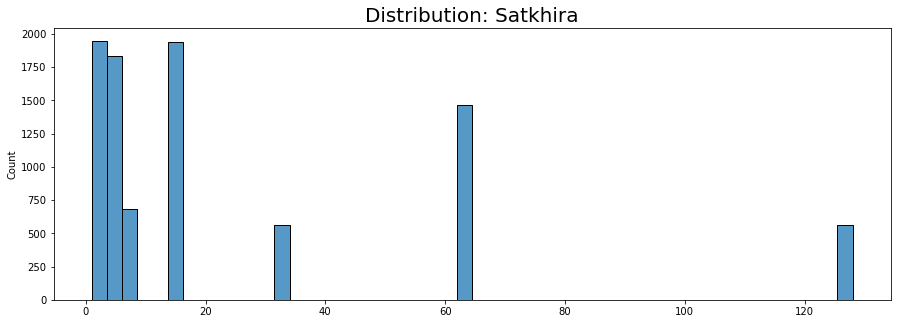

In [78]:
histo(dist = HydSHED, band = 'b1', bins = 50, city = 'Satkhira', level = 4 )

In [80]:
#AOI: Satkhira District (Khulna Division)
aoi = ee.Geometry.MultiPolygon(shp_to_ee_fmt(city = 'Sirajganj', level = 3))

# initialize the map
map1 = geemap.Map()
map1.centerObject(aoi, 13)
map1.addLayer(HydSHED.clip(aoi), HydSHEDVis, 'test', opacity=0.5)
#map1.addLayer(viirs.clip(aoi), {}, "VIIRS-DNB Nightlights", opacity=0.1)
#map1.addLayer(ghslSet.clip(aoi), ghslSetVis, 'GHSL Degree of Urbanization', opacity=0.5)
#map1.addLayer(ghslPop.clip(aoi), ghslPopVis, 'GHSL Population', opacity=0.5)
#map1.addLayer(srtm.clip(aoi), {'min':-1, 'max':14}, 'SRTM Elevation', opacity = 0.6)
#map1.addLayer(water.clip(aoi), waterVis, 'JRC Water Prevalence', opacity = 0.6)
map1.addLayer(pov_inc.clip(aoi), {'min':130, 'max':200, "palette":['red', 'yellow']}, "BD Poverty: Income", opacity=0.6)
map1.addLayer(pov_wi.clip(aoi), {'min':-0.2, 'max':1.2, "palette":['red', 'yellow']}, "BD cPoverty: Wealth Index", opacity=0.6)
map1.addLayerControl()
map1

Map(center=[24.4941068587996, 89.68848003563551], controls=(WidgetControl(options=['position', 'transparent_bg…

In [81]:
# Extract relevant polygons by class
p1 = uppr_set.filterMetadata('Pov_Quart','equals','Extremely Poor')
p2 = uppr_set.filterMetadata('Pov_Quart','equals','Marginally poor')
p3 = uppr_set.filterMetadata('Pov_Quart','equals','Moderately Poor')
p4 = uppr_set.filterMetadata('Pov_Quart','equals','Very Poor')

In [82]:
# SIRAJGANJ UPPR
map3 = geemap.Map(add_google_map = False)
map3.setCenter(lat = 24.4561, lon = 89.7039, zoom = 14)
#vis_params.update({"fillColor": "E30B17AA"})
vis_params = {
    'color': '000000', 
    'pointSize': 1,
    'pointShape': 'circle',
    'width': 0.5,
            'lineType': 'solid',
}
#Extremely Poor
vis_params.update({"fillColor": "E30B17AA"})
map3.addLayer(p1.style(**vis_params), vis_params, 'UPPR: Extremely Poor')
#Marginally poor
vis_params.update({"fillColor": "CCCCCCAA"})
map3.addLayer(p2.style(**vis_params), vis_params, 'UPPR: Marginally Poor')
#Moderately Poor
vis_params.update({"fillColor": "FEEAC0AA"})
map3.addLayer(p3.style(**vis_params), vis_params, 'UPPR: Moderately Poor')
#Very Poor
vis_params.update({"fillColor": "FDA883AA"})
map3.addLayer(p4.style(**vis_params), vis_params, 'UPPR: Very Poor')
vis_params.update({"fillColor": "729b6fAA"})
map3.addLayer(uppr_land.style(**vis_params), vis_params, 'UPPR: Vacant Land')
map3.addLayer(uppr_single, {'color': 'blue',}, 'UPPR: Single Poor HH')
map3.addLayer(HydSHED.clip(aoi), HydSHEDVis, 'HydroSHEDS: Drainage Direction', opacity=0.5)
map3

Map(center=[24.4561, 89.7039], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chi…

## Layers
* Google maps (comparison with OSM)
* VIIRS Nightlights Average Radiance 2019 median (approx. 500m resolution; B&W scale from dark to light indicating higher luminance)
* GHSL Settlements Classification 2015 (1Km resolution)
    - Black: Inhabited areas
    - Dark Green: RUR (rural grid cells)
    - Light Green: LDC (low density clusters)
    - White: HDC (high density clusters)
*	GHSL Population Estimations 2015 (250m resolution with scale from dark to light colours indicating higher population)
*	SRTM Elevation (90m resolution; B&W scale from dark to light indicating higher elevation values)
*	JRC Water surface levels: Occurrence 1984-1999, 2000-2020 (30m resolution; scale from light to dark blue indicating higher water prevalence; no colour = water never detected)
* Flowminder Bangladesh poverty estimates (2011-2013) by 1km grid (https://royalsocietypublishing.org/doi/full/10.1098/rsif.2016.0690)


In [18]:
import datapane as dp
dp.login(token='2b8de896fc86c1d7b568474c553dca773dc3c606')

Connected successfully to https://datapane.com as mtyrrell


'mtyrrell'

In [19]:
map3.publish(name='Sirajgang Municipal: UPPR ', description='Sirajganj GAUL Level 3 URBAN PARTNERSHIPS FOR POVERTY REDUCTION Poverty Assessments', visibility='PUBLIC')

Publishing document and associated data - *please wait...*

Your report doesn't contain any text - did you know you can add text to your report from your browser once published?

Your report only contains a single element - did you know you can add multiple plots and tables to a report, add text to it and export directly to Medium once published?

Report successfully published at https://datapane.com/u/mtyrrell/reports/sirajgang-municipal-uppr/ - you can edit and add additional text online

## TITLE
* Poverty Estimations: Quartile distribution. Source: Urban Partnerships for Poverty Reduction (UPPR) Project (Single layer for each classification)
    - RED: Extremely poor
    - PINK: Very poor
    - YELLOW: Moderately poor
    - GRAY: Marginally poor

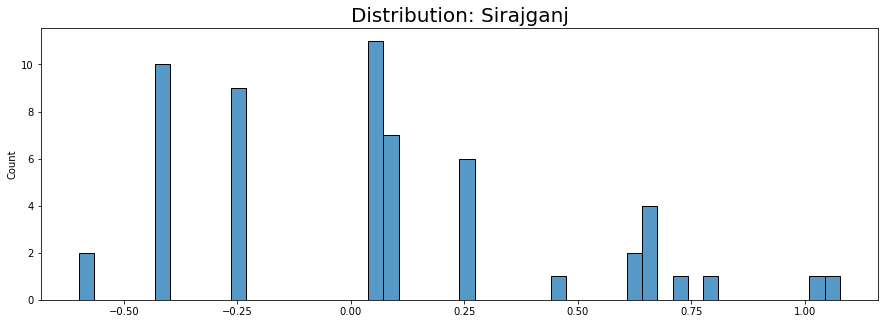

In [133]:
histo(dist = pov_wi, band = 'b1', bins = 50, city = 'Sirajganj', level = 4 )

In [21]:
#AOI: Satkhira District (Khulna Division)
aoi = ee.Geometry.MultiPolygon(shp_to_ee_fmt(city = 'Sirajganj', level = 3))

# initialize the map
map2 = geemap.Map()
map2.centerObject(aoi, 12)
map2.addLayer(viirs.clip(aoi), {}, "VIIRS-DNB Nightlights", opacity=0.5)
map2.addLayer(ghslSet.clip(aoi), ghslSetVis, 'GHSL Degree of Urbanization', opacity=0.5)
map2.addLayer(ghslPop.clip(aoi), ghslPopVis, 'GHSL Population', opacity=0.5)
map2.addLayer(srtm.clip(aoi), {'min':5, 'max':25}, 'SRTM Elevation', opacity = 0.6)
map2.addLayer(water.clip(aoi), waterVis, 'JRC Water Prevalence', opacity = 0.6)
map2.addLayer(pov_inc.clip(aoi), {'min':120, 'max':210, "palette":['red', 'yellow']}, "BD Poverty: Income", opacity=0.6)
map2.addLayer(pov_wi.clip(aoi), {'min':-0.75, 'max':1.1, "palette":['red', 'yellow']}, "BD cPoverty: Wealth Index", opacity=0.6)
#Extremely Poor
vis_params.update({"fillColor": "E30B17AA"})
map2.addLayer(p1.style(**vis_params), vis_params, 'UPPR: Extremely Poor')
#Marginally poor
vis_params.update({"fillColor": "CCCCCCAA"})
map2.addLayer(p2.style(**vis_params), vis_params, 'UPPR: Marginally Poor')
#Moderately Poor
vis_params.update({"fillColor": "FEEAC0AA"})
map2.addLayer(p3.style(**vis_params), vis_params, 'UPPR: Moderately Poor')
#Very Poor
vis_params.update({"fillColor": "FDA883AA"})
map2.addLayer(p4.style(**vis_params), vis_params, 'UPPR: Very Poor')
vis_params.update({"fillColor": "729b6fAA"})
map2.addLayer(uppr_land.style(**vis_params), vis_params, 'UPPR: Vacant Land')
map2.addLayer(uppr_single, {'color': 'blue',}, 'UPPR: Single Poor HH')
map2.addLayerControl()
map2

In [22]:
map2.publish(name='Sirajganj Municipal: Multi Layer', description='Sirajganj GAUL Level 3 with VIIRS, GHSL, Topo, Water & Poverty', visibility='PUBLIC')

Publishing document and associated data - *please wait...*

Your report doesn't contain any text - did you know you can add text to your report from your browser once published?

Your report only contains a single element - did you know you can add multiple plots and tables to a report, add text to it and export directly to Medium once published?

Report successfully published at https://datapane.com/u/mtyrrell/reports/sirajganj-municipal-multi-layer/ - you can edit and add additional text online